# Deep inside: Autoencoders

This notebook is the complement of [this blog post](https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f)

4 types of autoencoders are described using the Keras framework and the MNIST dataset

1. Vanilla autoencoders
2. Multilayer autoencoder
3. Convolutional autoencoder
4. Regularized autoencoder

## Import the libraries

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.python.keras import layers
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.layers.core import Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from tensorflow.python.keras.utils import np_utils
from PIL import Image 

## Load the data

We don't need the labels as the autoencoders are unsupervised network

In [2]:
mnist_path=r"C:\Users\OMEN\Desktop\凌特杯\Autoencoders-master\mnist\mnist.npz"
(X_train, _), (X_test, _) = mnist.load_data(mnist_path)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## Normalize the data

We want the pixels values between 0 and 1 instead of between 0 and 255

In [3]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Flatten the images for the Fully-Connected Networks

In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

___

# **Vanilla Autoencoder**

### Create the network

The first network is the most simple autoencoder. It has three layers : Input - encoded - decoded

In [5]:
input_size = 784
hidden_size = 64
output_size = 784

In [6]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

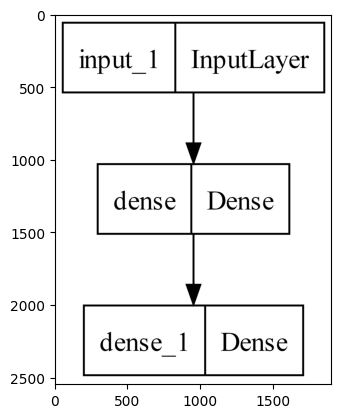

In [7]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

from keras.utils import plot_model
plot_model(autoencoder, to_file='model1.png',dpi=960)

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imdecode(np.fromfile("C:/Users/OMEN/Desktop/凌特杯/Autoencoders-master/model1.png",dtype=np.uint8),-1) #读取带中文图片
# print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Train

In [8]:
epochs = 15
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0446 - val_loss: 0.0228
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0177 - val_loss: 0.0131
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0089
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 8/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 9/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 10/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0042

313/313 [==============================] - 0s 767us/step
<class 'numpy.ndarray'> 640000 10000 64 [[ 8.432418   5.3868074  8.671089   1.984246 ]
 [ 4.770669  12.590436   6.264064   9.070472 ]
 [ 6.4729333  3.9872532 18.913986  13.601575 ]
 [ 8.861785  12.725501   3.2698085  6.614702 ]
 [ 9.863955   6.699226   1.7133043 10.303185 ]
 [ 4.2208724  8.754192   4.0045476  3.2147765]
 [ 2.8840685 10.450731   3.1786435  5.2897415]
 [ 5.097032   9.983263   5.2364397 10.522091 ]
 [ 2.1472325  1.6094632  5.47175    4.0057845]
 [ 9.06736    9.601526   4.7280297  4.4164886]
 [ 7.790691  15.363286   7.020358  10.807414 ]
 [ 5.579521   9.236033   8.861392   7.5874424]
 [ 6.0535784  4.197916  10.9126215  6.4623137]
 [ 7.005581   2.1852765  6.819262   4.6247344]
 [ 9.951025   5.7082396  4.998459   8.625221 ]
 [ 3.867024   6.4643016 12.266731   6.880919 ]]


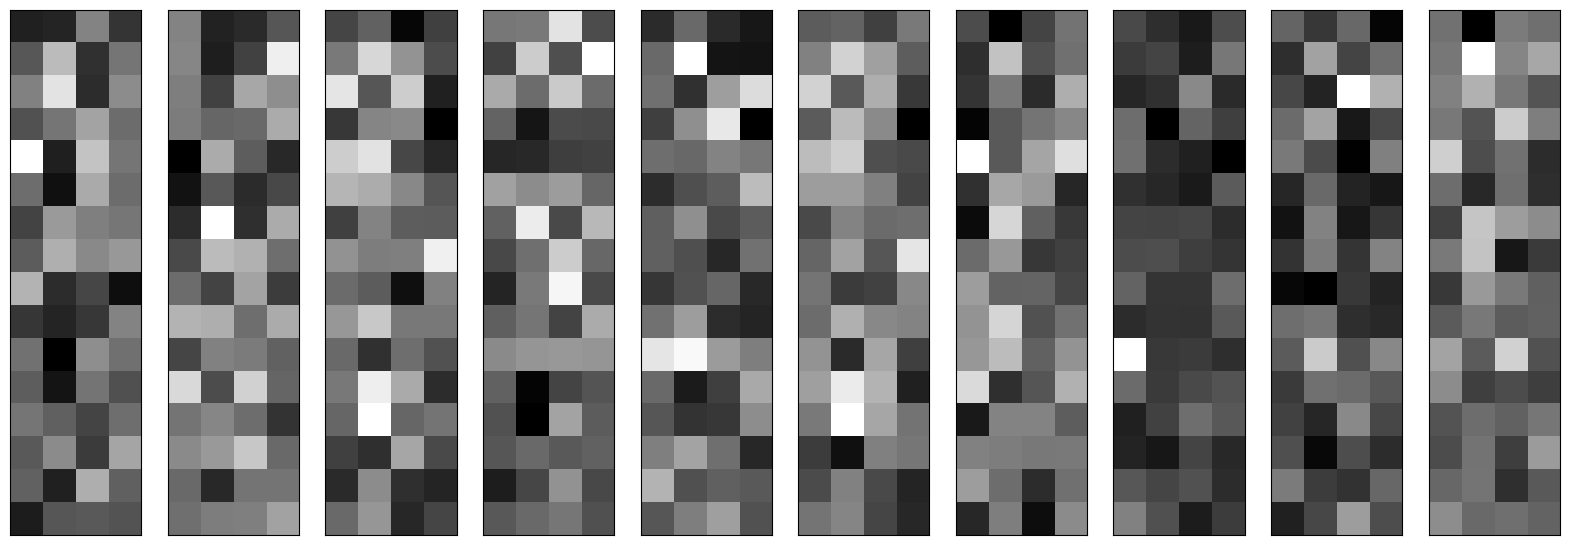

64 64


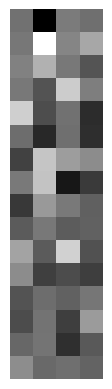

In [9]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)
print(type(encoded_imgs),encoded_imgs.size,np.size(encoded_imgs,0),np.size(encoded_imgs,1),encoded_imgs[8].reshape(4, 16).T)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig("./test.png".format(i))
plt.show()
for i in range(n):
    plt.figure
    plt.gray()
    plt.axis('off')
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.savefig("./test{}.png".format(i))
print(encoded_imgs[1].size,np.size(encoded_imgs[1],0))

<class 'numpy.ndarray'> 640000 10000
313/313 [==============================] - 0s 777us/step


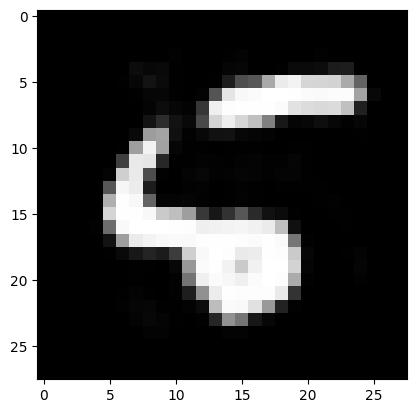

In [56]:
conv_encoder_test=Model(h,r)

data_test = encoded_imgs[8].T # 转化成numpy数组
data_test = data_test.flatten()
data_test=np.expand_dims(data_test,0).repeat(10000,axis=0)
print(type(data_test),data_test.size,np.size(data_test,0))
encoded_imgs_test=conv_encoder_test.predict(data_test)

plt.imshow(encoded_imgs_test[1].reshape(28, 28))

### Predict on the test set

In [29]:
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 0s 939us/step


### Plot

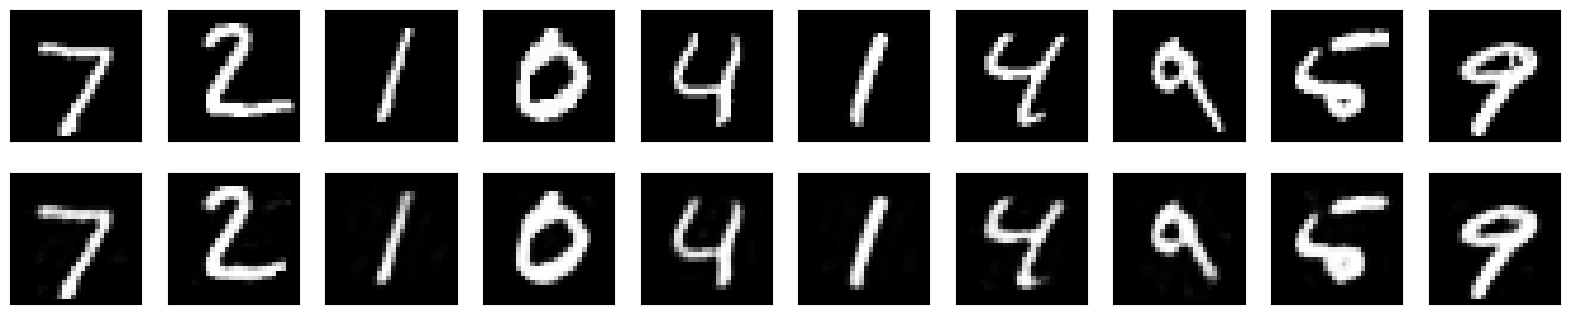

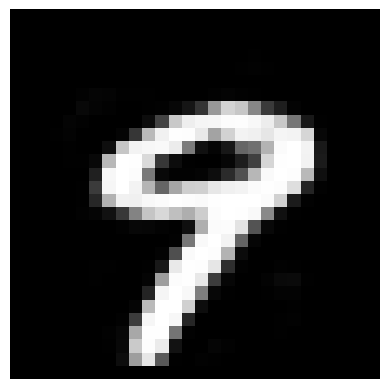

In [30]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig("./number.png".format(i))
    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig("./decoder.png".format(i))
    
plt.show()
for i in range(n):
    plt.figure
    plt.gray()
    plt.axis('off')
    plt.imshow(X_test[i].reshape(28, 28))
    plt.savefig("./number{}.png".format(i))
for i in range(n):
    plt.figure
    plt.gray()
    plt.axis('off')
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.savefig("./decoder{}.png".format(i))

### Plot the losses

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig("./loss.png")
plt.show()

---

# **Multilayer autoencoder**

### Create the network

We extend the idea of the first network to more layers

In [ ]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

from keras.utils import plot_model
plot_model(autoencoder, to_file='model2.png',dpi=960)

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imdecode(np.fromfile("C:/Users/OMEN/Desktop/凌特杯/Autoencoders-master/model2.png",dtype=np.uint8),-1) #读取带中文图片
# print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Train the network

In [ ]:
epochs = 1
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

### Predict on the test set

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig("./多层_number.png".format(i))

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig("./多层_decoder.png".format(i))
    
plt.show()

### Plot the losses

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig("./多层_loss.png")
plt.show()